<a href="https://colab.research.google.com/github/ArunK-ML/Learn---Deep-Learning---CNN/blob/main/PyTorch_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Introduction to PyTorch**
### **Training a Simple CNN on the MNIST Dataset - Handwrittent Digits**


### **1. Import our libaries and modules**

  import PyTorch by importing ```torch```.  'll be using **torchvision** which is a PyTorch package that consists of popular datasets, model acrhitectures and common image transformations.

In [1]:
# Import PyTorch
import torch

# use torchvision to get our dataset and useful image transformations
import torchvision
import torchvision.transforms as transforms

# Import PyTorch's optimization libary and nn
# nn is used as the basic building block for our Network graphs
import torch.optim as optim
import torch.nn as nn

# check if GPU?
print("GPU available: {}".format(torch.cuda.is_available()))

GPU available: True


#### If GPU is available set device = ```'cuda'``` if not set device = ```'cpu'```

In [2]:
if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'

### **2.   define our transformer**

Transfomers are needed to cast the image data into the required format for input into our model.

- It's composed using the ```transforms.Compose``` function
-   chain the commands or instructions for our pipeline as the arguements
-   use ```transforms.ToTensor()``` to convert the image data into a PyTorch Tensor
-   use ```transforms.Normalize()``` to normalize our pixel values
- By passing the input as ```(0.5, ), (0.5,)```   Normalize our image data bet en -1 and +1
- Note for RGB images   use ```transformed.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))``` instead

**NOTE**:
Our raw pixel values in our MNIST dataset range from 0 to 255. Each image is 28 pixels heigh and 28 pixels wide, with a depth of 1 as it's grayscale.

**Why Normalize?**

1. To ensure all features, or in our case, pixel intensities, are  ighted equally when training our CNN
2. Makes training faster as it avoids oscilations during training
3. Removes and bias or skewness in our image data


**Why 0.5?**

Normalization is done like this:

`image = (image - mean) / std`

Using the parameters 0.5,0.5 sets the Mean and STD to 0.5. Using the formula above this gives us:

- Min value = `(0-0.5)/0.5 = 1`
- Max value = `(1-0.5)/0.5 = -1`

For color images   use a tuple of (0.5,0.5,0.5) to set the Mean of the RGB channels to 0.5 and another tuple of (0.5, 0.5, 0.5) to set the STD to 0.5

In [3]:
# Transform to a PyTorch tensors and the normalize our valeus bet en -1 and +1
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, ), (0.5, )) ])

### **3. Fetch our MNIST Dataset using torchvision**

**NOTE**

- Many online tutorials state transforms are applied upon loading. That is NOT true. Transformers are only applied when loaded by our Data Loader.
- Dataset is left unchanged, only batches of images loaded by the our Data Loader are copied and transformed every iteration.
- View other datasets that can be accesed via torchvision here - https://pytorch.org/vision/stable/datasets.html

In [4]:
# Load Training Data and specify what transform to use when loading
trainset = torchvision.datasets.MNIST('mnist',
                                      train = True,
                                      download = True,
                                      transform = transform)

# Load Test Data and specify what transform to use when loading
testset = torchvision.datasets.MNIST('mnist',
                                     train = False,
                                     download = True,
                                     transform = transform)

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.53MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 132kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.09MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.01MB/s]


### **About Training and Test Data**

There are two subsets of the data being used here:

- **Training data** Data that is used to optimize model parameters (used during training)
- **Test/Validation data** Data that is used to evaluate the model performance
   use the test set for both validation and test.


### **4. Let's inpsect a sample of our training data**




Let's inspect our training and test dataset dimensions.

In [5]:
#   have 60,000 Image samples for our training data & 10,000 for our test data
# each 28 x 28 pixels, as they are grayscale, there is no 3rd dimension to our image
print(trainset.data.shape)
print(testset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


#### **Let's look at the an Individual Sample of Data**

You will see that our data has not yet been normalized bet en -1 and 1.

In [6]:
# This is the first value in our dataset
print(trainset.data[0].shape)
print(trainset.data[0])

torch.Size([28, 28])
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,  

### **Only for understanding**



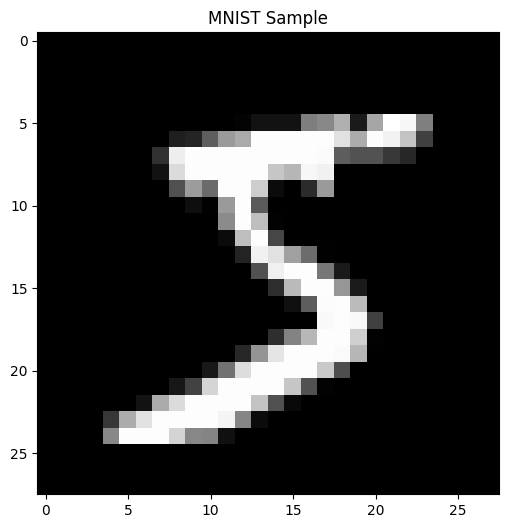

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imgshow(title="", image = None, size = 6):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Convert image to a numpy array
image = trainset.data[0].numpy()
imgshow("MNIST Sample", image)

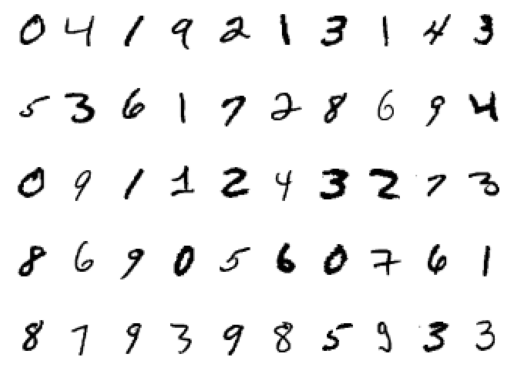

In [8]:
# Let's view the 50 first images of the MNIST training dataset
import matplotlib.pyplot as plt

figure = plt.figure()
num_of_images = 50

for index in range(1, num_of_images + 1):
    plt.subplot(5, 10, index)
    plt.axis('off')
    plt.imshow(trainset.data[index], cmap='gray_r')

### **5. Create our Data Loader**

A **Data Loader** is a function that  'll use to grab our data in specified batch sizes ( 'll use 128) during training.



In [9]:
# Prepare train and test loader
trainloader = torch.utils.data.DataLoader(trainset,
                                           batch_size = 128,
                                           shuffle = True,
                                           num_workers = 0)

testloader = torch.utils.data.DataLoader(testset,
                                          batch_size = 128,
                                          shuffle = False,
                                          num_workers = 0)

#### **Using Iter and Next() for load batches**


In [10]:
#   use the Python function iter to return an iterator for our train_loader object
dataiter = iter(trainloader)

#   use next to get the first batch of data from our iterator
images, labels =  next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128])


In [11]:
images[0].shape

torch.Size([1, 28, 28])

### ** PyTorch Image Plotting Tool**

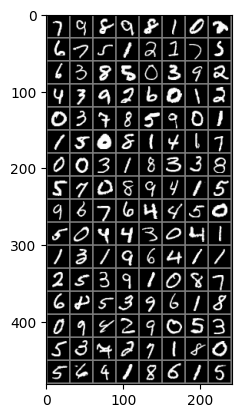

79898102675121756385039243926012037859011508141700318338570894159676445050443041131964112539108768539618094290535372718056418615


In [12]:
import matplotlib.pyplot as plt
import numpy as np

# function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels =  next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(''.join('%1s' % labels[j].numpy() for j in range(128)))

# **build our Model**


In [13]:
import torch.nn as nn
import torch.nn.functional as F #

# Create our Model using a Python Class
class Net(nn.Module):
    def __init__(self):
        # super is a subclass of the nn.Module and inherits all its methods
        super(Net, self).__init__()

        #   define our layer objects here
        # Our first CNN Layer using 32 Fitlers of 3x3 size, with stride of 1 & padding of 0
        self.conv1 = nn.Conv2d(1, 32, 3)
        # Our second CNN Layer using 64 Fitlers of 3x3 size, with stride of 1 & padding of 0
        self.conv2 = nn.Conv2d(32, 64, 3)
        # Our Max Pool Layer 2 x 2 kernel of stride 2
        self.pool = nn.MaxPool2d(2, 2)
        # Our first Fully Connected Layer (called Linear), takes the output of our Max Pool
        # which is 12 x 12 x 64 and connects it to a set of 128 nodes
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        # Our second Fully Connected Layer, connects the 128 nodes to 10 output nodes (our classes)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # here   define our forward propogation sequence
        # Remember it's Conv1 - Relu - Conv2 - Relu - Max Pool - Flatten - FC1 - FC2
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 12 * 12) # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the model and move it (memory and operations) to the CUDA device
net = Net()
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

### **Printing out our Model**

In [14]:
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


### ** Defining a Loss Function and Optimizer**
 Stochastic Gradient Descent (SGD) -   also specify a learn rate (LR) of 0.001 and momentum 0.9

In [15]:
#   import our optimizer function
import torch.optim as optim

#   use Cross Entropy Loss as our loss function
criterion = nn.CrossEntropyLoss()

# For our gradient descent algorthim or Optimizer
#   use Stochastic Gradient Descent (SGD) with a learning rate of 0.001
#   set the momentum to be 0.9
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### ** Training Our Model**





In [16]:
#   loop over the traing dataset multiple times (each time is called an epoch)
epochs = 10

# Create some empty arrays to store logs
epoch_log = []
loss_log = []
accuracy_log = []

# Iterate for a specified number of epochs
for epoch in range(epochs):
    print(f'Starting Epoch: {epoch+1}...')

    #   keep adding or accumulating our loss after each mini-batch in running_loss
    running_loss = 0.0

    #   iterate through our trainloader iterator
    # Each cycle is a minibatch
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # Move our data to GPU
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Clear the gradients before training by setting to zero
        # Required for a fresh start
        optimizer.zero_grad()

        # Forward -> backprop + optimize
        outputs = net(inputs) # Forward Propagation
        loss = criterion(outputs, labels) # Get Loss (quantify the difference bet en the results and predictions)
        loss.backward() # Back propagate to obtain the new gradients for all nodes
        optimizer.step() # Update the gradients/ ights

        # Print Training statistics - Epoch/Iterations/Loss/Accuracy
        running_loss += loss.item()
        if i % 50 == 49:    # show our loss every 50 mini-batches
            correct = 0 # Initialize our variable to hold the count for the correct predictions
            total = 0 # Initialize our variable to hold the count of the number of labels iterated

            #   don't need gradients for validation, so wrap in
            # no_grad to save memory
            with torch.no_grad():
                # Iterate through the testloader iterator
                for data in testloader:
                    images, labels = data
                    # Move our data to GPU
                    images = images.to(device)
                    labels = labels.to(device)

                    # Foward propagate our test data batch through our model
                    outputs = net(images)

                     # Get predictions from the maximum value of the predicted output tensor
                     #   set dim = 1 as it specifies the number of dimensions to reduce
                    _, predicted = torch.max(outputs.data, dim = 1)
                    # Keep adding the label size or length to the total variable
                    total += labels.size(0)
                    # Keep a running total of the number of predictions predicted correctly
                    correct += (predicted == labels).sum().item()

                accuracy = 100 * correct / total
                epoch_num = epoch + 1
                actual_loss = running_loss / 50
                print(f'Epoch: {epoch_num}, Mini-Batches Completed: {(i+1)}, Loss: {actual_loss:.3f}, Test Accuracy = {accuracy:.3f}%')
                running_loss = 0.0

    # Store training stats after each epoch
    epoch_log.append(epoch_num)
    loss_log.append(actual_loss)
    accuracy_log.append(accuracy)

print('Finished Training')

Starting Epoch: 1...
Epoch: 1, Mini-Batches Completed: 50, Loss: 2.278, Test Accuracy = 30.520%
Epoch: 1, Mini-Batches Completed: 100, Loss: 2.151, Test Accuracy = 64.750%
Epoch: 1, Mini-Batches Completed: 150, Loss: 1.786, Test Accuracy = 73.780%
Epoch: 1, Mini-Batches Completed: 200, Loss: 1.080, Test Accuracy = 84.110%
Epoch: 1, Mini-Batches Completed: 250, Loss: 0.607, Test Accuracy = 86.480%
Epoch: 1, Mini-Batches Completed: 300, Loss: 0.481, Test Accuracy = 87.810%
Epoch: 1, Mini-Batches Completed: 350, Loss: 0.432, Test Accuracy = 88.530%
Epoch: 1, Mini-Batches Completed: 400, Loss: 0.395, Test Accuracy = 89.730%
Epoch: 1, Mini-Batches Completed: 450, Loss: 0.370, Test Accuracy = 90.660%
Starting Epoch: 2...
Epoch: 2, Mini-Batches Completed: 50, Loss: 0.335, Test Accuracy = 91.280%
Epoch: 2, Mini-Batches Completed: 100, Loss: 0.324, Test Accuracy = 91.530%
Epoch: 2, Mini-Batches Completed: 150, Loss: 0.299, Test Accuracy = 91.880%
Epoch: 2, Mini-Batches Completed: 200, Loss: 0.2

## **9. Saving Our Model**

  use the ```torch.save()``` function to save our model.

```net.state_dict()``` saves our model  ights in a dictionay format.

In [17]:
PATH = './mnist_cnn_net.pth'
torch.save(net.state_dict(), PATH)

### **Test Data and view their Ground Truth labels**

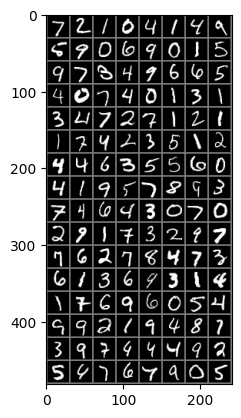

GroundTruth:  72104149590690159734966540740131347271211742351244635560419578937464307029173297762784736136931417696054992194873974449254767905


In [18]:
# Loading one mini-batch
dataiter = iter(testloader)
images, labels = next(dataiter)

# Display images using torchvision's utils.make_grid()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ',''.join('%1s' % labels[j].numpy() for j in range(128)))

### **reload the saved model **

In [19]:
# Create an instance of the model and move it (memory and operations) to the CUDA device.
net = Net()
net.to(device)

# Load  ights from the specified path
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

#### **Getting Predictions**

Note when working with tensors on the GPU,   have to convert it back to a numpy array to perform python operations on it.

```your_tensor.cpu().numpy()```

In [20]:
## Let's forward propagate one mini-batch and get the predicted outputs
#   use the Python function iter to return an iterator for our train_loader object
test_iter = iter(testloader)

#   use next to get the first batch of data from our iterator
images, labels = next(test_iter)

# Move our data to GPU
images = images.to(device)
labels = labels.to(device)

outputs = net(images)

# Get the class predictions using torch.max
_, predicted = torch.max(outputs, 1)

# Print our 128 predictions
print('Predicted: ', ''.join('%1s' % predicted[j].cpu().numpy() for j in range(128)))

Predicted:  72104149590690159734966540740131347271211742351244635560419578937464307029173297762784736136931417696054992194873974449254767905


#### **Showing our Test Accuracy again**

In [21]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Move our data to GPU
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy:.3}%')

Accuracy of the network on the 10000 test images: 98.1%


## **10. Plotting our Training Logs**



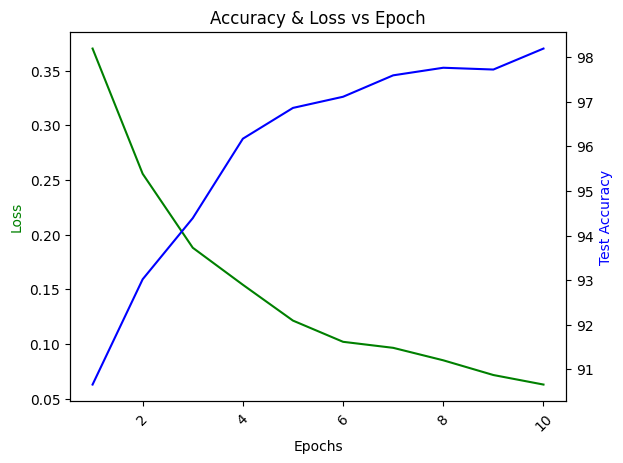

In [22]:
# To create a plot with secondary y-axis   need to create a subplot
fig, ax1 = plt.subplots()

# Set title and x-axis label rotation
plt.title("Accuracy & Loss vs Epoch")
plt.xticks(rotation=45)

#   use twinx to create a plot a secondary y axis
ax2 = ax1.twinx()

# Create plot for loss_log and accuracy_log
ax1.plot(epoch_log, loss_log, 'g-')
ax2.plot(epoch_log, accuracy_log, 'b-')

# Set labels
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='g')
ax2.set_ylabel('Test Accuracy', color='b')

plt.show()

# **Observations**



In [23]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

#   don't need gradients for validation, so wrap in
# no_grad to save memory
with torch.no_grad():
    for data in testloader:
        images, labels = data

        # Move our data to GPU
        images = images.to(device)
        labels = labels.to(device)

        # Get our outputs
        outputs = net(images)

        # use torch.max() to get the predicted class for the first dim of our batch
        # note this is just the first 16 data points/images of our batch of 128 images
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()

        for i in range(15):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    class_accuracy = 100 * class_correct[i] / class_total[i]
    print(f'Accuracy of {i} : {class_accuracy:.3f}%')

Accuracy of 0 : 99.130%
Accuracy of 1 : 97.744%
Accuracy of 2 : 97.656%
Accuracy of 3 : 99.167%
Accuracy of 4 : 96.850%
Accuracy of 5 : 99.074%
Accuracy of 6 : 98.148%
Accuracy of 7 : 97.561%
Accuracy of 8 : 99.000%
Accuracy of 9 : 96.748%


In [24]:
c

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True], device='cuda:0')

**NOTE**

```net.eval()``` is a kind of switch for some specific layers/parts of the model that behave differently during training and inference (evaluating) time. For example, Dropouts Layers, BatchNorm Layers etc. You need to turn off them during model evaluation, and .eval() will do it for you. In addition, the common practice for evaluating/validation is using torch.no_grad() in pair with model.eval() to turn off gradients computation:

Actual Label: 0, Predicted Label: 6


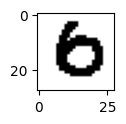

Actual Label: 3, Predicted Label: 7


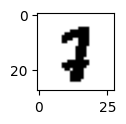

Actual Label: 7, Predicted Label: 2


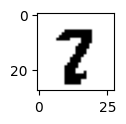

Actual Label: 3, Predicted Label: 5


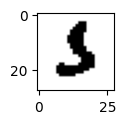

Actual Label: 0, Predicted Label: 6


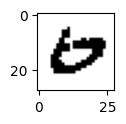

Actual Label: 5, Predicted Label: 3


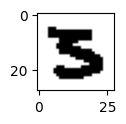

Actual Label: 3, Predicted Label: 7


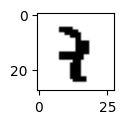

Actual Label: 2, Predicted Label: 8


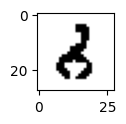

Actual Label: 8, Predicted Label: 2


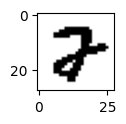

Actual Label: 8, Predicted Label: 2


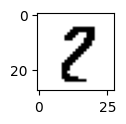

Actual Label: 8, Predicted Label: 1


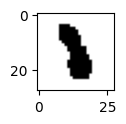

Actual Label: 1, Predicted Label: 2


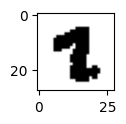

Actual Label: 3, Predicted Label: 7


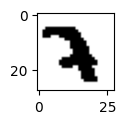

Actual Label: 6, Predicted Label: 0


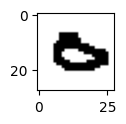

Actual Label: 8, Predicted Label: 5


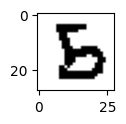

Actual Label: 9, Predicted Label: 4


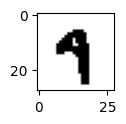

Actual Label: 9, Predicted Label: 7


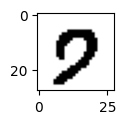

Actual Label: 7, Predicted Label: 9


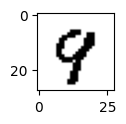

Actual Label: 9, Predicted Label: 8


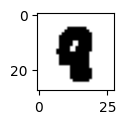

Actual Label: 2, Predicted Label: 1


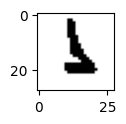

Actual Label: 0, Predicted Label: 6


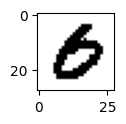

Actual Label: 5, Predicted Label: 6


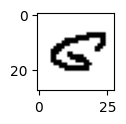

Actual Label: 2, Predicted Label: 7


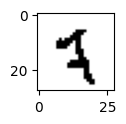

Actual Label: 8, Predicted Label: 6


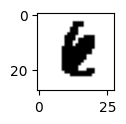

Actual Label: 4, Predicted Label: 8


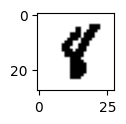

Actual Label: 8, Predicted Label: 6


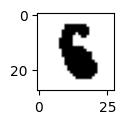

Actual Label: 2, Predicted Label: 7


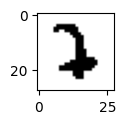

Actual Label: 4, Predicted Label: 9


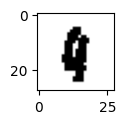

Actual Label: 0, Predicted Label: 9


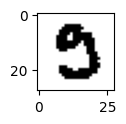

Actual Label: 1, Predicted Label: 7


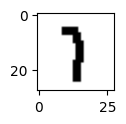

Actual Label: 7, Predicted Label: 5


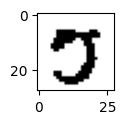

Actual Label: 3, Predicted Label: 8


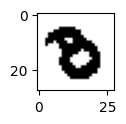

Actual Label: 2, Predicted Label: 7


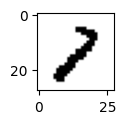

Actual Label: 6, Predicted Label: 2


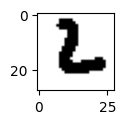

Actual Label: 3, Predicted Label: 5


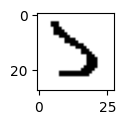

Actual Label: 1, Predicted Label: 7


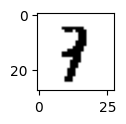

Actual Label: 9, Predicted Label: 7


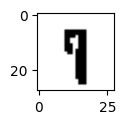

Actual Label: 6, Predicted Label: 1


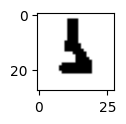

Actual Label: 7, Predicted Label: 8


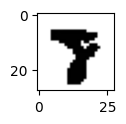

Actual Label: 3, Predicted Label: 9


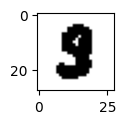

Actual Label: 0, Predicted Label: 2


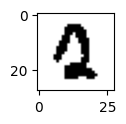

Actual Label: 3, Predicted Label: 9


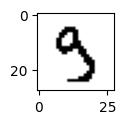

Actual Label: 0, Predicted Label: 8


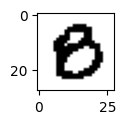

Actual Label: 3, Predicted Label: 7


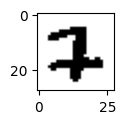

Actual Label: 8, Predicted Label: 2


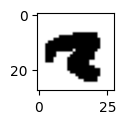

Actual Label: 0, Predicted Label: 6


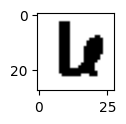

Actual Label: 4, Predicted Label: 9


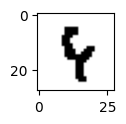

Actual Label: 0, Predicted Label: 5


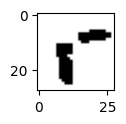

Actual Label: 0, Predicted Label: 2


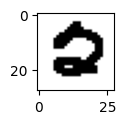

Actual Label: 2, Predicted Label: 7


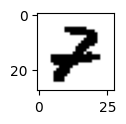

Actual Label: 3, Predicted Label: 5


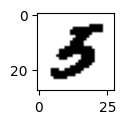

Actual Label: 8, Predicted Label: 4


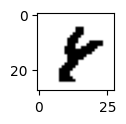

Actual Label: 9, Predicted Label: 4


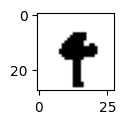

Actual Label: 0, Predicted Label: 2


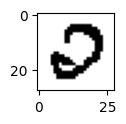

Actual Label: 9, Predicted Label: 3


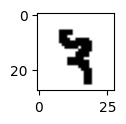

Actual Label: 0, Predicted Label: 6


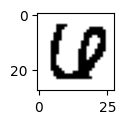

Actual Label: 2, Predicted Label: 9


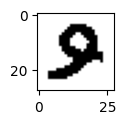

Actual Label: 9, Predicted Label: 4


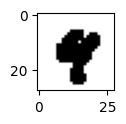

Actual Label: 1, Predicted Label: 6


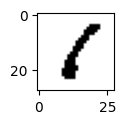

Actual Label: 2, Predicted Label: 1


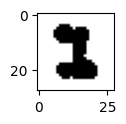

Actual Label: 6, Predicted Label: 1


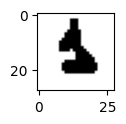

Actual Label: 0, Predicted Label: 8


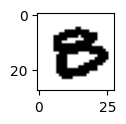

Actual Label: 0, Predicted Label: 9


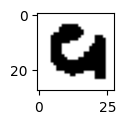

Actual Label: 8, Predicted Label: 5


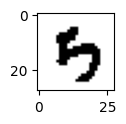

Actual Label: 1, Predicted Label: 9


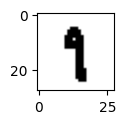

Actual Label: 1, Predicted Label: 9


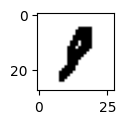

Actual Label: 4, Predicted Label: 6


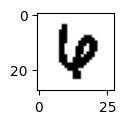

Actual Label: 8, Predicted Label: 6


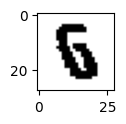

Actual Label: 0, Predicted Label: 2


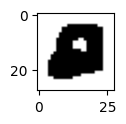

Actual Label: 4, Predicted Label: 2


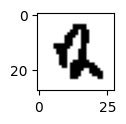

Actual Label: 8, Predicted Label: 7


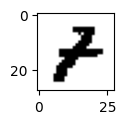

Actual Label: 1, Predicted Label: 6


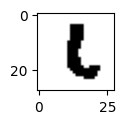

Actual Label: 4, Predicted Label: 9


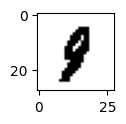

Actual Label: 0, Predicted Label: 8


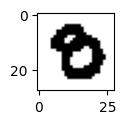

Actual Label: 2, Predicted Label: 3


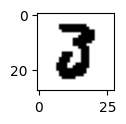

Actual Label: 2, Predicted Label: 3


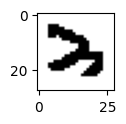

Actual Label: 5, Predicted Label: 9


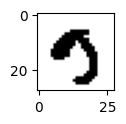

Actual Label: 5, Predicted Label: 3


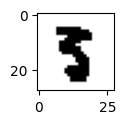

Actual Label: 4, Predicted Label: 9


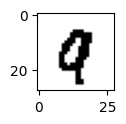

Actual Label: 8, Predicted Label: 6


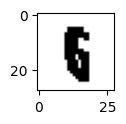

Actual Label: 7, Predicted Label: 9


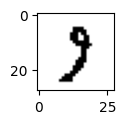

Actual Label: 2, Predicted Label: 1


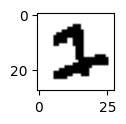

Actual Label: 0, Predicted Label: 6


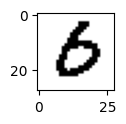

Actual Label: 8, Predicted Label: 7


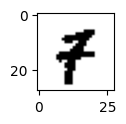

Actual Label: 3, Predicted Label: 8


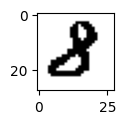

Actual Label: 0, Predicted Label: 6


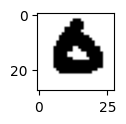

Actual Label: 1, Predicted Label: 9


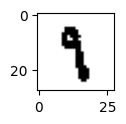

Actual Label: 4, Predicted Label: 6


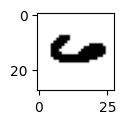

Actual Label: 5, Predicted Label: 6


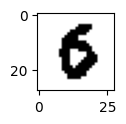

Actual Label: 0, Predicted Label: 5


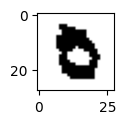

Actual Label: 5, Predicted Label: 8


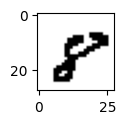

Actual Label: 3, Predicted Label: 9


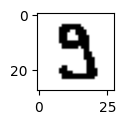

Actual Label: 0, Predicted Label: 7


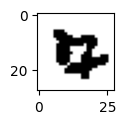

Actual Label: 9, Predicted Label: 4


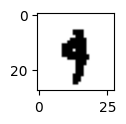

Actual Label: 2, Predicted Label: 7


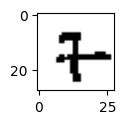

Actual Label: 2, Predicted Label: 7


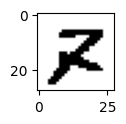

Actual Label: 8, Predicted Label: 5


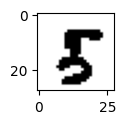

Actual Label: 8, Predicted Label: 2


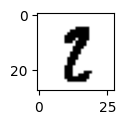

Actual Label: 0, Predicted Label: 6


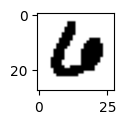

Actual Label: 8, Predicted Label: 5


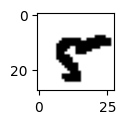

Actual Label: 8, Predicted Label: 7


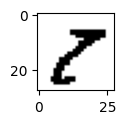

Actual Label: 8, Predicted Label: 7


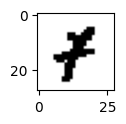

Actual Label: 5, Predicted Label: 6


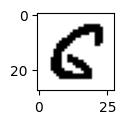

Actual Label: 0, Predicted Label: 5


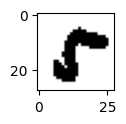

Actual Label: 4, Predicted Label: 9


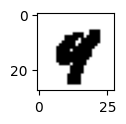

Actual Label: 3, Predicted Label: 1


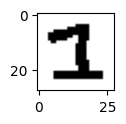

Actual Label: 1, Predicted Label: 7


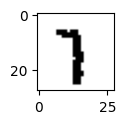

Actual Label: 9, Predicted Label: 7


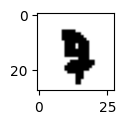

Actual Label: 2, Predicted Label: 0


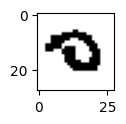

Actual Label: 0, Predicted Label: 8


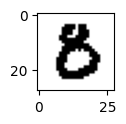

Actual Label: 3, Predicted Label: 9


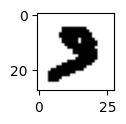

Actual Label: 4, Predicted Label: 9


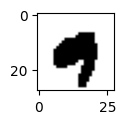

Actual Label: 9, Predicted Label: 7


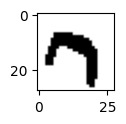

Actual Label: 0, Predicted Label: 9


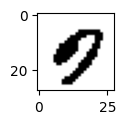

Actual Label: 7, Predicted Label: 2


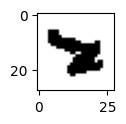

Actual Label: 7, Predicted Label: 9


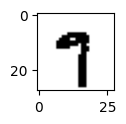

Actual Label: 3, Predicted Label: 7


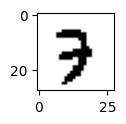

Actual Label: 8, Predicted Label: 2


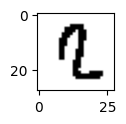

Actual Label: 7, Predicted Label: 2


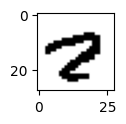

Actual Label: 4, Predicted Label: 9


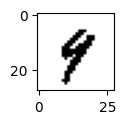

Actual Label: 5, Predicted Label: 6


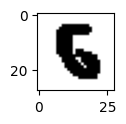

Actual Label: 9, Predicted Label: 7


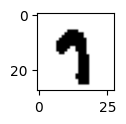

Actual Label: 4, Predicted Label: 8


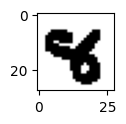

Actual Label: 4, Predicted Label: 2


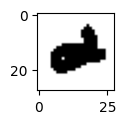

Actual Label: 9, Predicted Label: 8


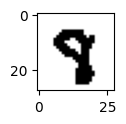

Actual Label: 8, Predicted Label: 9


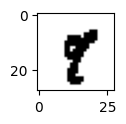

Actual Label: 0, Predicted Label: 8


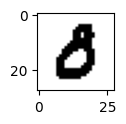

Actual Label: 0, Predicted Label: 6


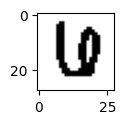

Actual Label: 4, Predicted Label: 9


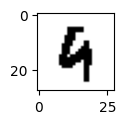

Actual Label: 0, Predicted Label: 9


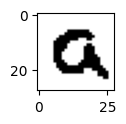

Actual Label: 6, Predicted Label: 8


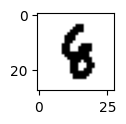

Actual Label: 8, Predicted Label: 0


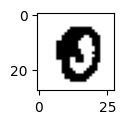

Actual Label: 4, Predicted Label: 8


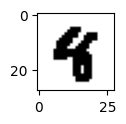

Actual Label: 3, Predicted Label: 7


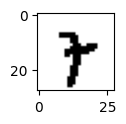

Actual Label: 5, Predicted Label: 3


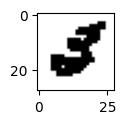

Actual Label: 6, Predicted Label: 1


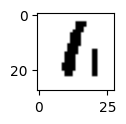

Actual Label: 9, Predicted Label: 7


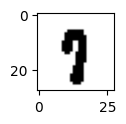

Actual Label: 8, Predicted Label: 2


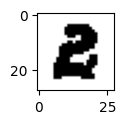

Actual Label: 8, Predicted Label: 1


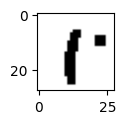

Actual Label: 7, Predicted Label: 3


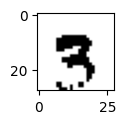

Actual Label: 0, Predicted Label: 7


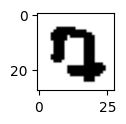

Actual Label: 0, Predicted Label: 4


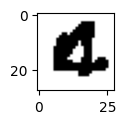

Actual Label: 8, Predicted Label: 3


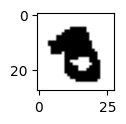

Actual Label: 8, Predicted Label: 3


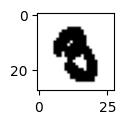

Actual Label: 0, Predicted Label: 2


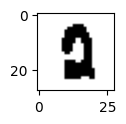

Actual Label: 3, Predicted Label: 9


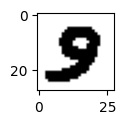

Actual Label: 5, Predicted Label: 9


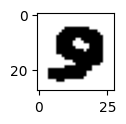

Actual Label: 3, Predicted Label: 9


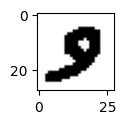

Actual Label: 0, Predicted Label: 9


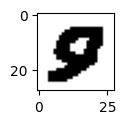

Actual Label: 0, Predicted Label: 9


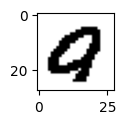

Actual Label: 5, Predicted Label: 9


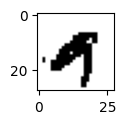

Actual Label: 2, Predicted Label: 3


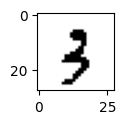

Actual Label: 7, Predicted Label: 9


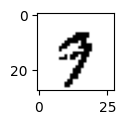

Actual Label: 1, Predicted Label: 7


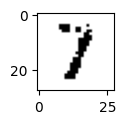

Actual Label: 7, Predicted Label: 0


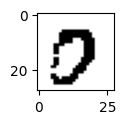

Actual Label: 5, Predicted Label: 9


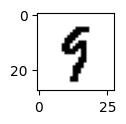

Actual Label: 2, Predicted Label: 0


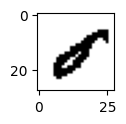

Actual Label: 0, Predicted Label: 9


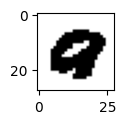

Actual Label: 6, Predicted Label: 1


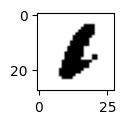

Actual Label: 4, Predicted Label: 6


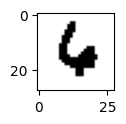

Actual Label: 9, Predicted Label: 8


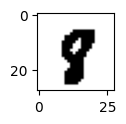

Actual Label: 8, Predicted Label: 4


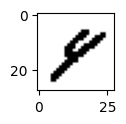

Actual Label: 4, Predicted Label: 2


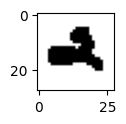

Actual Label: 1, Predicted Label: 2


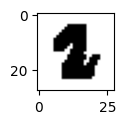

Actual Label: 8, Predicted Label: 2


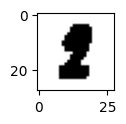

Actual Label: 5, Predicted Label: 8


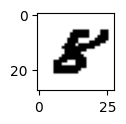

Actual Label: 6, Predicted Label: 0


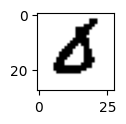

Actual Label: 5, Predicted Label: 8


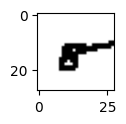

Actual Label: 2, Predicted Label: 7


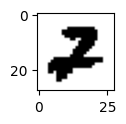

Actual Label: 2, Predicted Label: 7


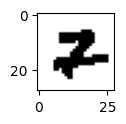

Actual Label: 2, Predicted Label: 7


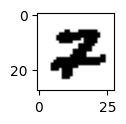

Actual Label: 2, Predicted Label: 7


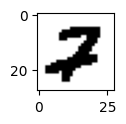

Actual Label: 2, Predicted Label: 7


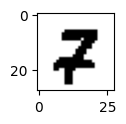

Actual Label: 8, Predicted Label: 1


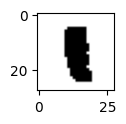

Actual Label: 8, Predicted Label: 0


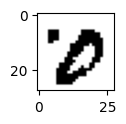

Actual Label: 7, Predicted Label: 2


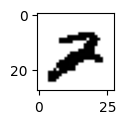

Actual Label: 5, Predicted Label: 6


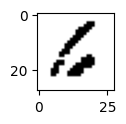

Actual Label: 6, Predicted Label: 5


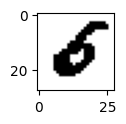

Actual Label: 6, Predicted Label: 5


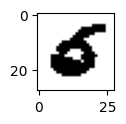

Actual Label: 0, Predicted Label: 5


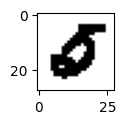

Actual Label: 8, Predicted Label: 2


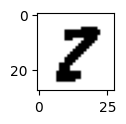

Actual Label: 3, Predicted Label: 2


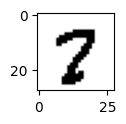

Actual Label: 5, Predicted Label: 9


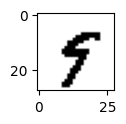

Actual Label: 7, Predicted Label: 3


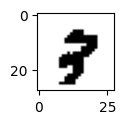

Actual Label: 0, Predicted Label: 6


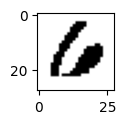

Actual Label: 6, Predicted Label: 5


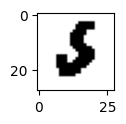

In [25]:
net.eval()

#   don't need gradients for validation, so wrap in
# no_grad to save memory
with torch.no_grad():
    for data in testloader:
        images, labels = data

        # Move our data to GPU
        images = images.to(device)
        labels = labels.to(device)

        # Get our outputs
        outputs = net(images)

        # use torch.argmax() to get the predictions, argmax is used for long_tensors
        predictions = torch.argmax(outputs, dim=1)

        # For test data in each batch   identify when predictions did not match the label
        # then   print out the actual ground truth
        for i in range(data[0].shape[0]):
            pred = predictions[i].item()
            label = labels[i]
            if(label != pred):
                print(f'Actual Label: {pred}, Predicted Label: {label}')
                img = np.reshape(images[i].cpu().numpy(),[28,28])
                imgshow("", np.uint8(img), size = 1)

In [26]:
nb_classes = 10

confusion_matrix = torch.zeros(nb_classes, nb_classes)

with torch.no_grad():
    for i, (inputs, classes) in enumerate(testloader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = net(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

print(confusion_matrix)

tensor([[9.7300e+02, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         2.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.1240e+03, 3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
         4.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00],
        [5.0000e+00, 2.0000e+00, 1.0080e+03, 1.0000e+00, 3.0000e+00, 0.0000e+00,
         1.0000e+00, 4.0000e+00, 8.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 3.0000e+00, 9.9900e+02, 0.0000e+00, 3.0000e+00,
         0.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.7500e+02, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 2.0000e+00, 4.0000e+00],
        [4.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 8.7700e+02,
         3.0000e+00, 1.0000e+00, 4.0000e+00, 0.0000e+00],
        [1.0000e+01, 2.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00, 5.0000e+00,
         9.3400e+02, 0.0000e+00, 4.0000e+00, 0.0000e+00],
        [2.0000e+00, 4.0000

In [27]:
print(confusion_matrix.diag()/confusion_matrix.sum(1))

tensor([0.9929, 0.9903, 0.9767, 0.9891, 0.9929, 0.9832, 0.9749, 0.9679, 0.9805,
        0.9653])


In [28]:
from sklearn.metrics import confusion_matrix

nb_classes = 10

# Initialize the prediction and label lists(tensors)
predlist=torch.zeros(0,dtype=torch.long, device='cpu')
lbllist=torch.zeros(0,dtype=torch.long, device='cpu')

with torch.no_grad():
    for i, (inputs, classes) in enumerate(testloader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = net(inputs)
        _, preds = torch.max(outputs, 1)

        # Append batch prediction results
        predlist=torch.cat([predlist,preds.view(-1).cpu()])
        lbllist=torch.cat([lbllist,classes.view(-1).cpu()])

# Confusion matrix
conf_mat=confusion_matrix(lbllist.numpy(), predlist.numpy())
print(conf_mat)

# Per-class accuracy
class_accuracy=100*conf_mat.diagonal()/conf_mat.sum(1)
print(class_accuracy)

[[ 973    0    2    0    0    0    2    1    2    0]
 [   0 1124    3    1    0    0    4    0    3    0]
 [   5    2 1008    1    3    0    1    4    8    0]
 [   0    0    3  999    0    3    0    2    2    1]
 [   1    0    0    0  975    0    0    0    2    4]
 [   4    0    0    3    0  877    3    1    4    0]
 [  10    2    0    0    3    5  934    0    4    0]
 [   2    4   11    6    0    0    0  995    4    6]
 [   5    0    1    2    3    3    1    1  955    3]
 [   7    3    1    6    8    5    0    4    1  974]]
[99.28571429 99.030837   97.6744186  98.91089109 99.28716904 98.31838565
 97.49478079 96.78988327 98.04928131 96.53121903]
